In [2]:
import numpy
import matplotlib.pyplot as plt

import project_module as pm

inputFile = './input/trainData.txt'

# restart kernel
import importlib
importlib.reload(pm)

D, L = pm.load(inputFile)

In [ ]:
# Change default font size - comment to use default values
plt.rc('font', size=16)
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)

In [3]:
def logpdf_GAU_ND(x, mu, C):
    P = numpy.linalg.inv(C)     # precision matrix
    return -0.5*x.shape[0]*numpy.log(numpy.pi*2) - 0.5*numpy.linalg.slogdet(C)[1] - 0.5 * ((x-mu) * (P @ (x-mu))).sum(0)

In [9]:
def compute_ll(X, mu, C):
    return logpdf_GAU_ND(X, mu, C).sum()

In [4]:
D0 = D[:, L==0]
D1 = D[:, L==1]

# compute ML estimates
m0_ML, C0_ML = pm.compute_mu_C(D0)
print(m0_ML)
print(C0_ML)
m1_ML, C1_ML = pm.compute_mu_C(D1)
print(m1_ML)
print(C1_ML)


[[ 0.00287744]
 [ 0.01869316]
 [-0.68094016]
 [ 0.6708362 ]
 [ 0.02795697]
 [-0.0058274 ]]
[[ 5.69581054e-01  4.43400885e-03  8.43170041e-03  1.44479381e-02
   1.42672670e-02 -1.41150344e-03]
 [ 4.43400885e-03  1.42086571e+00 -4.75806611e-03 -1.22432969e-02
  -2.57280214e-03 -5.54092626e-03]
 [ 8.43170041e-03 -4.75806611e-03  5.49977025e-01  1.32035878e-02
  -1.15251868e-02  1.11043986e-02]
 [ 1.44479381e-02 -1.22432969e-02  1.32035878e-02  5.36042661e-01
   7.07380678e-03  1.59744284e-02]
 [ 1.42672670e-02 -2.57280214e-03 -1.15251868e-02  7.07380678e-03
   6.80073597e-01  1.20001652e-02]
 [-1.41150344e-03 -5.54092626e-03  1.11043986e-02  1.59744284e-02
   1.20001652e-02  7.05038438e-01]]
[[ 5.44547838e-04]
 [-8.52437392e-03]
 [ 6.65237846e-01]
 [-6.64195349e-01]
 [-4.17251858e-02]
 [ 2.39384879e-02]]
[[ 1.43023345  0.00586459 -0.00328748  0.01305324  0.00569339 -0.02439541]
 [ 0.00586459  0.57827792 -0.0085804  -0.006824   -0.0063889   0.0042779 ]
 [-0.00328748 -0.0085804   0.5489026 

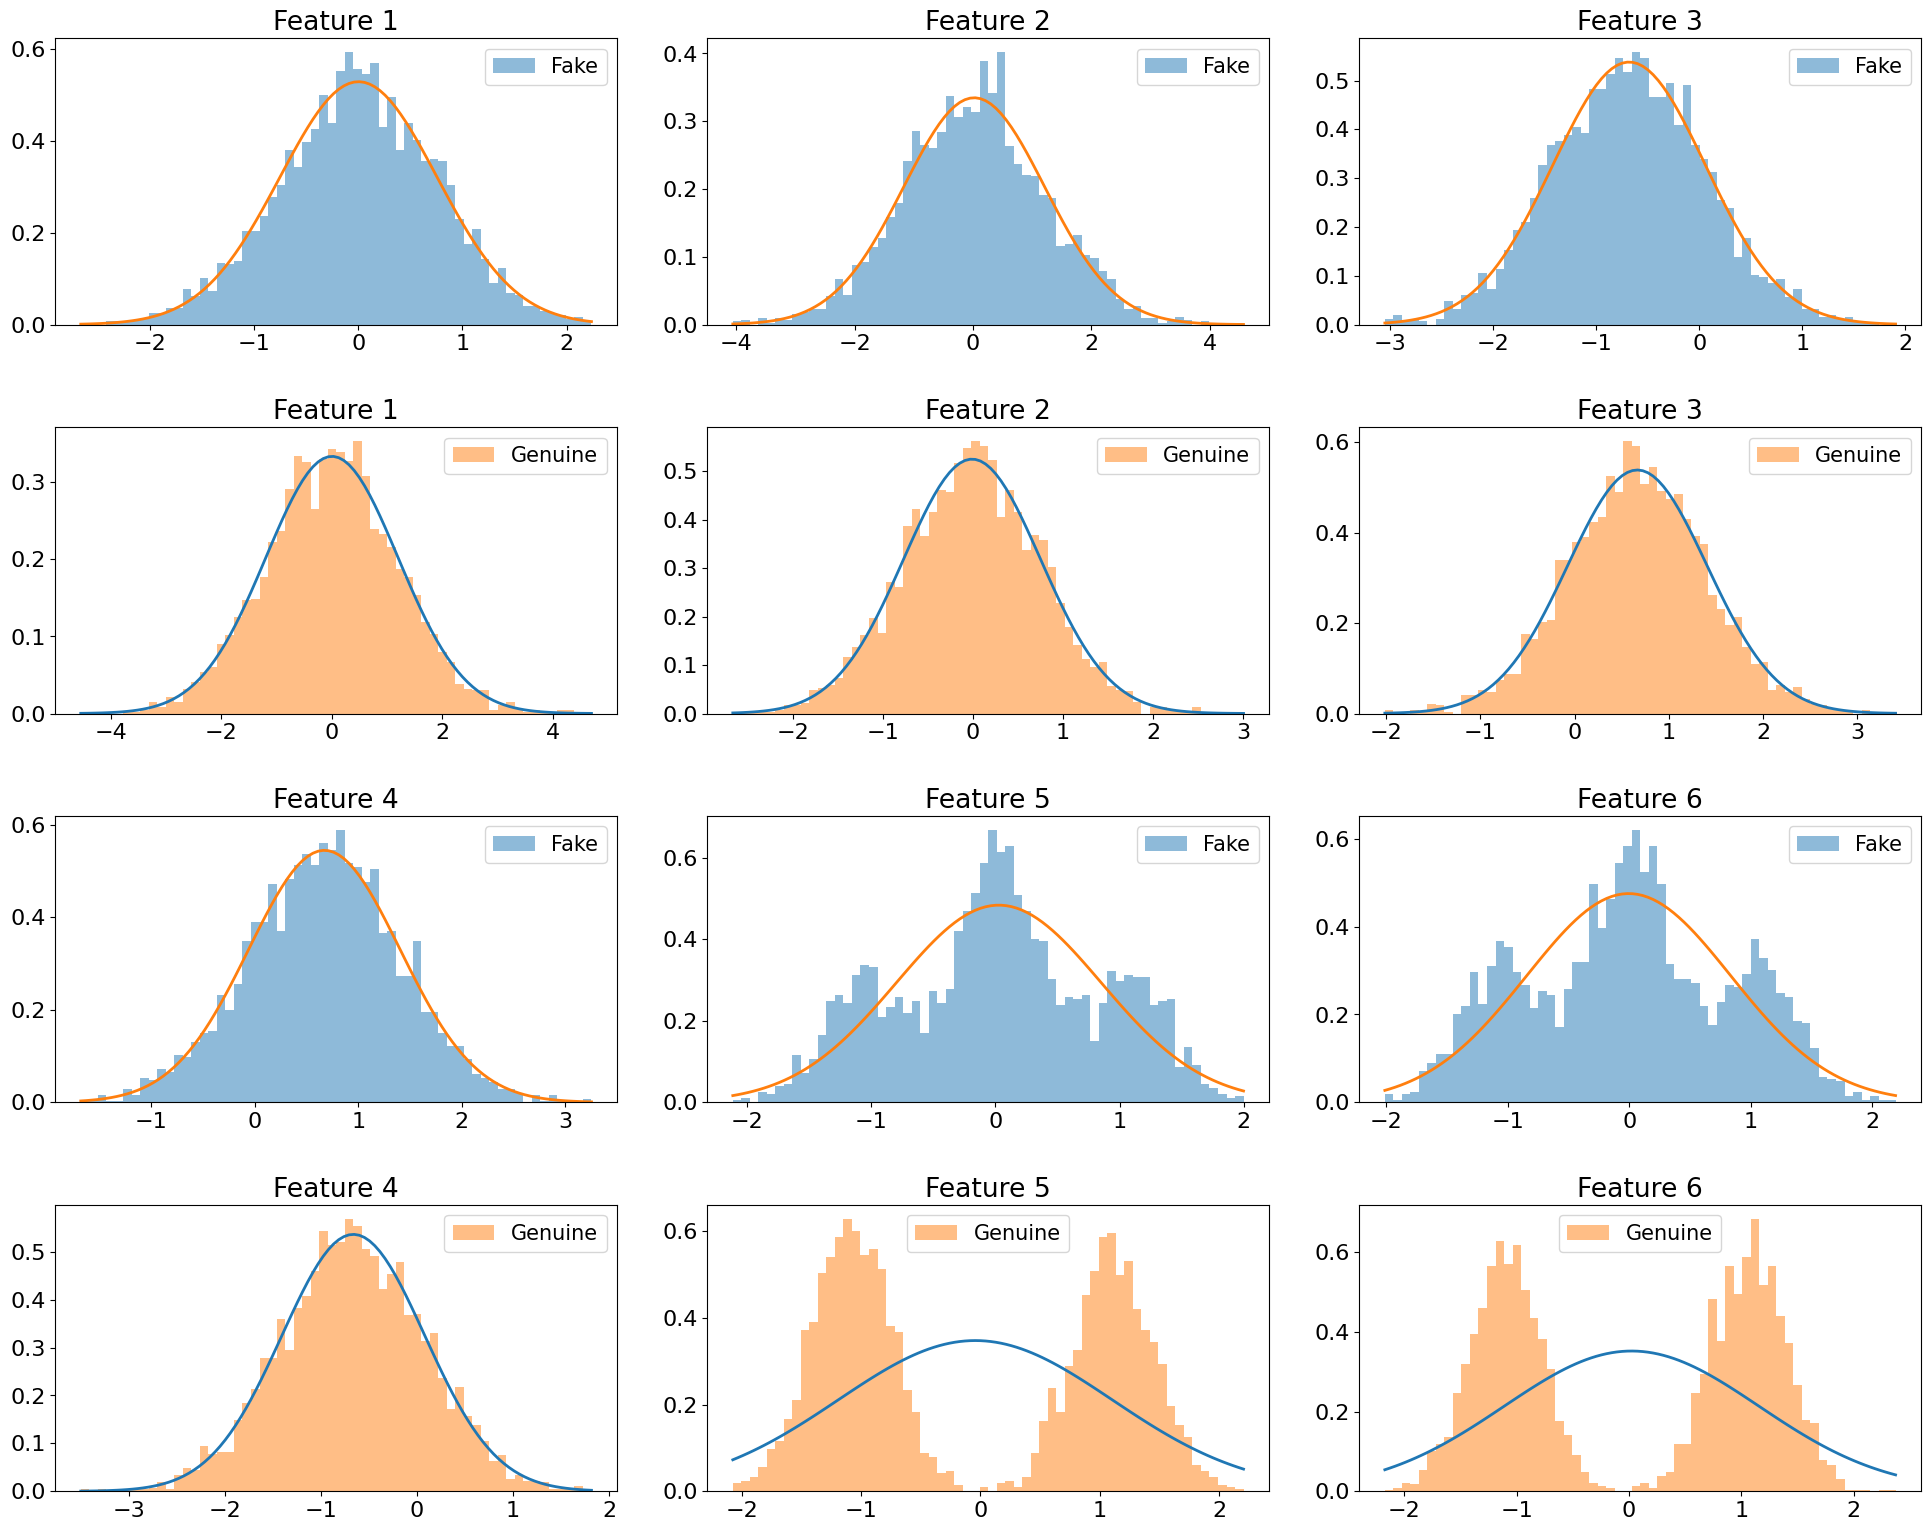

In [52]:
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(20,16))
#D0 = D[:, L==0]
#D1 = D[:, L==1]

#mu0_ML, C0_ML = pm.compute_mu_C(D0)
#mu1_ML, C1_ML = pm.compute_mu_C(D1)

for f in range(6):
  feat0 = D0[f, :]
  feat1 = D1[f, :]

  rowOffset = 0 if f<3 else 2
  colIdx = f%3


  # Class 0 - Fake

  # histogram
  axs[0+rowOffset][colIdx].hist(feat0, bins=60, alpha=0.5, label='Fake', density=True)
  axs[0+rowOffset][colIdx].set_title(f'Feature {f+1}')
  
  # gaussian pdf
  x_vals = numpy.linspace(min(feat0), max(feat0), 100)
  m0_feat = m0_ML[f]
  C0_feat = numpy.array([[C0_ML[f, f]]])      # 1x1 variance array
  pdf0 = numpy.exp(logpdf_GAU_ND(pm.vrow(x_vals), m0_feat, C0_feat))
  axs[0+rowOffset][colIdx].plot(x_vals, pdf0, linewidth=2)


  # Class 1 - Genuine

  # gaussian pdf
  x_vals = numpy.linspace(min(feat1), max(feat1), 100)
  m1_feat = m1_ML[f]
  C1_feat = numpy.array([[C1_ML[f, f]]])      # 1x1 variance array
  pdf1 = numpy.exp(logpdf_GAU_ND(pm.vrow(x_vals), m1_feat, C1_feat))
  axs[1+rowOffset][colIdx].plot(x_vals, pdf1, linewidth=2)
  
  #histogram
  axs[1+rowOffset][colIdx].hist(feat1, bins=60, alpha=0.5, label='Genuine', density=True)
  axs[1+rowOffset][colIdx].set_title(f'Feature {f+1}')



  axs[0+rowOffset][colIdx].legend(fontsize=15)
  axs[1+rowOffset][colIdx].legend(fontsize=15)

fig.tight_layout(pad=2)
plt.savefig('./outputs/L4/pdf/Gaussian_Density_Estimation.pdf')
plt.savefig('./outputs/L4/jpg/Gaussian_Density_Estimation.jpg')

